In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df = sn.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
Dicionario = pd.DataFrame ([
    {"Variável": "Survived",
     "Descrição": "Se a pessoa sobreviveu ou não ao acidente",
     "Tipo": "Qualitativa",
     "subtipo": "Ordininária"},
    {"Variável": "Pclass",
     "Descrição": "Classe em que o passageiro estava viajando",
     "Tipo": "Quantitativa",
     "subtipo": "Ordinal"
                            },
    {"Variável": "Sex",
     "Descrição": "Sexo dos Tripulantes",
     "Tipo": "Qualitativa",
     "Subtipo": "Nominal"
                            },
    {"Variável": "Age",
     "Descrição": "Idade das pesssoas",
     "Tipo": "Quantitativa",
     "subtipo": "Discreta" #Se a idade fosse mais precisa (25 anos e 6 meses, por exemplo) seria contínua
                            },
    { "Variável": "Sibsp",
     "Descrição": "Se a pessoa estava ou não acompanhada na viagem",
     "Tipo": "Quantitativa",
     "Subtipo": "Discreta"
                            },
    { "Variável": "Parch",
     "Descrição": "Quantidade de pais e filhos que o passageiro estava levando",
     "Tipo": "Quantitativa",
     "Subtipo": "Discreta",
                            },
    { "Variável": "Fare",
     "Descrição": "Valor da passagem",
     "Tipo": "Quantitativa",
     "Subtipo": "Contínua"
                            },
    { "Variável": "Embarked",
     "Descrição": "Porto em que a pessoa embarcou",
     "Tipo": "Qualitativa",
     "Subtipo": "Nominal"
                            },
    { "Variável": "Class",
    "Descrição": "Classe em que o passageiro estava viajando",
     "Tipo": "Quantitativa",
     "subtipo": "Ordinal"
                             },
    { "Variável": "Who",
     "Descrição": "Sexo dos passegeiros",
     "Tipo": "Qualitativa",
     "Subtipo": "Nominal"
                            },
    { "Variável": "Adult_male",
     "Descrição": "Se o passageiro era ou não adulto",
     "Tipo": "Qualitativo",
     "Subtipo": "Nominal"
                            },
    { "Variável": "Deck",
     "Descrição": "Em qual deck a pessoa estava",
     "Tipo": "Qualitativa",
     "Subtipo": "Nominal"
                            },
    { "Variável": "Embarked_Town",
     "Descrição": "Cidade onde a pessoa embarcou",
     "Tipo": "Qualitativa",
     "Subtipo":"Nominal"
                            },
    { "Variável": "Alive",
     "Descrição": "Se a pessoa sobreviveu ou não",
     "Tipo": "Qualitatitva",
     "Subtipo": "Nominal"
                            },
     { "Variável": "Alone",
      "Descrição": "Se a pessoa estava sozinha ou acompanhada",
      "Tipo": "Qualitativa",
      "Subtipo": "Nominal"
                             }
     
])
Dicionario

Percebamos que algumas variáveis querem dizer a mesma coisa, por exemplo: Survive e alive, ambas falam se o passageiro sobreviveu ou não. Pclass e class, ambas falam a classe em que o passageiro viajava.Embarked e Embarked_town, ambas falam a cidade em que o passageiro embarcou. E, por último,Sibsp e Alone ambas falam se o passageiro estava acompanhado ou sozinho

Sobreviveram: 342
Morreram: 549


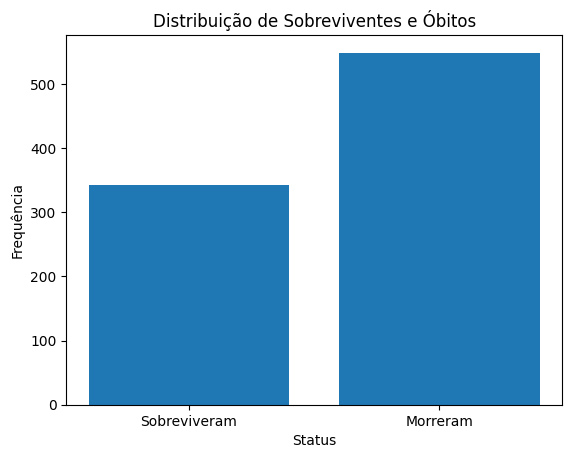

In [10]:
sobreviveram = (df['alive'] == 'yes').sum() #método mais fácil para somar coisa específicas em um dataframe 
morreram = (df['alive'] == 'no').sum()



print("Sobreviveram:", sobreviveram)
print("Morreram:", morreram)


plt.bar(['Sobreviveram', 'Morreram'], [sobreviveram, morreram])
plt.xlabel('Status')
plt.ylabel('Frequência')
plt.title('Distribuição de Sobreviventes e Óbitos')
plt.show()



In [14]:
mans_survived = ((df['survived'] == 1) & (df['sex'] == 'male')).sum()
woman_survived = ((df['survived']== 1) & (df['sex'] == 'female')).sum()
ticket_medio = (df['fare']).mean()
print(f"Quantidade de homens que sobreviveram: {mans_survived}")
print(f"Quantidade de mulheres que sobreviveram {woman_survived}")
print(f"Preço médio da passagem {ticket_medio:.3f}")

Quantidade de homens que sobreviveram: 109
Quantidade de mulheres que sobreviveram 233
Preço médio da passagem 32.204


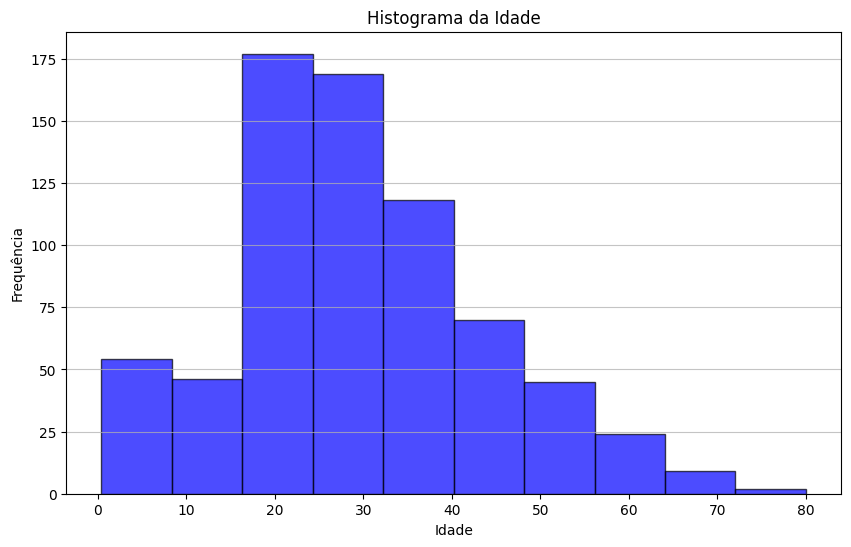

29.69911764705882


In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()
print((df['age']).mean())


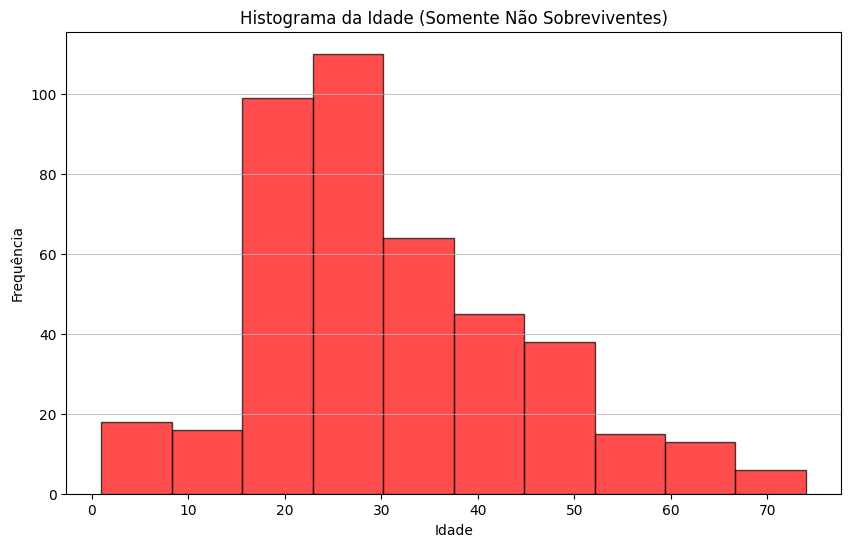

In [15]:
df_false_survived = df[df['survived'] == 0]


plt.figure(figsize=(10, 6))
plt.hist(df_false_survived['age'], bins=10, color='red', alpha=0.7, edgecolor='black')
plt.title('Histograma da Idade (Somente Não Sobreviventes)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Relação entre sobreviventes e mortos de passageiros que viajaram na primeira e terceira classe


Podemos perceber que a maioria dos passageiros acabaram falecendo, mas isso é um dado muito superficial, podemos explorar, por exemplo, a relação entre os sobreviventes e os passsageiros que viajaram na primeira classe:  

O fato do passageiro estar na primeira classe aumentava a possibilidade dele sobreviver?


In [17]:
Survival = df['survived']
first_class = df['pclass'] == 1
Survival_first_class  = (Survival & first_class).sum()
percentage_survival = Survival_first_class/ sobreviveram * 100

correlation = Survival.corr(first_class.astype(int)) 

print(f"A correlação entre sobrevivência e estar na primeira classe é: {correlation}")
print(f"Quantidade de pessoas que sobreviveram e que estavam na primeira classe {Survival_first_class}")
print(f"E isso corresponde a {percentage_survival:.2f}% dos sobreviventes totais")


A correlação entre sobrevivência e estar na primeira classe é: 0.28590376778374327
Quantidade de pessoas que sobreviveram e que estavam na primeira classe 136
E isso corresponde a 39.77% dos sobreviventes totais
